In [3]:
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision
import torch.nn as nn
from tqdm.notebook import tqdm, trange
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import pandas as pd
import torch.nn.functional as F
import matplotlib.pyplot as plt
import zipfile
from google.colab import drive
import os
import numpy as np
import warnings
from torchvision import transforms
from torchsummary import summary
from torchvision.io import read_image
import time
from sklearn.metrics import precision_score, recall_score, accuracy_score
warnings.filterwarnings('ignore')

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
zip_file_path = '/content/drive/MyDrive/2_semestr/PP/annotations.zip'
# Распаковать архив в текущую папку
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall()

In [6]:
class ROP_Dataset(Dataset):
    def __init__(self, txt_file, image_dir, transform=None):
        self.image_list = pd.read_csv(txt_file, header=None)
        self.image_dir = image_dir
        self.transform = transform

    def __len__(self):
        return len(self.image_list)

    def __getitem__(self, idx):
        img_path = os.path.join(self.image_dir, self.image_list.iloc[idx, 0])
        image = Image.open(img_path)
        img_tag = self.image_list.iloc[idx, 1]

        if self.transform:
            image = self.transform(image)
        sample = {"image": image, "tag": img_tag}

        return image, img_tag

In [7]:
MEAN = torch.tensor([0.485, 0.456, 0.406])
STD  = torch.tensor([0.229, 0.224, 0.225])

In [8]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=MEAN, std=STD)  # Normaliztion
])

# Create Dataset Training
dataset_train = ROP_Dataset(txt_file='/content/drive/MyDrive/2_semestr/PP/train_3classes.txt', image_dir='./annotations/images', transform=transform)
# Create Dataset Testing
dataset_test = ROP_Dataset(txt_file='/content/drive/MyDrive/2_semestr/PP/test_3classes.txt', image_dir='./annotations/images', transform=transform)
# Create Dataset Validation
dataset_valid = ROP_Dataset(txt_file='/content/drive/MyDrive/2_semestr/PP/valid_3classes.txt', image_dir='./annotations/images', transform=transform)


# DataLoader Training
dataloader_train = DataLoader(dataset_train, batch_size=32, shuffle=True)
# DataLoader Testing
dataloader_test = DataLoader(dataset_test, batch_size=32, shuffle=True)
# DataLoader Validation
dataloader_valid = DataLoader(dataset_valid, batch_size=32, shuffle=True)

print(next(iter(dataset_train)))

(tensor([[[-1.7240, -1.7412, -1.7240,  ..., -1.8268, -1.8268, -1.8097],
         [-1.7240, -1.7583, -1.7412,  ..., -1.8268, -1.8268, -1.8097],
         [-1.7412, -1.7412, -1.7412,  ..., -1.8439, -1.8268, -1.8268],
         ...,
         [-1.8439, -1.8610, -1.8439,  ..., -1.8610, -1.8610, -1.8610],
         [-1.8268, -1.8610, -1.8610,  ..., -1.8610, -1.8610, -1.8610],
         [-1.8439, -1.8439, -1.8610,  ..., -1.8610, -1.8610, -1.8610]],

        [[-1.8081, -1.7906, -1.8081,  ..., -1.8431, -1.7906, -1.7731],
         [-1.7906, -1.7906, -1.7906,  ..., -1.8081, -1.7906, -1.7906],
         [-1.7731, -1.7731, -1.7906,  ..., -1.7906, -1.7906, -1.7906],
         ...,
         [-1.8256, -1.8431, -1.8256,  ..., -1.8081, -1.7906, -1.7906],
         [-1.8256, -1.8081, -1.8256,  ..., -1.8256, -1.7906, -1.7731],
         [-1.8081, -1.7906, -1.8081,  ..., -1.8081, -1.7906, -1.7906]],

        [[-1.4907, -1.5430, -1.6127,  ..., -1.5430, -1.5953, -1.5604],
         [-1.5604, -1.5604, -1.5779,  ..., -

In [9]:
print(f'Number of training examples: {len(dataset_train)}')
print(f'Number of validation examples: {len(dataset_valid)}')
print(f'Number of test examples: {len(dataset_test)}')

Number of training examples: 309
Number of validation examples: 50
Number of test examples: 87


In [10]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f'Using {device} for inference')

Using cuda for inference


Training - Learning Rate: 0.001 - Epoch 1/10, Training Loss: 0.6159, Recall: 0.8004, Precision: 0.8110, Accuracy: 0.8004
Training - Learning Rate: 0.001 - Epoch 2/10, Training Loss: 0.3634, Recall: 0.8815, Precision: 0.7770, Accuracy: 0.8815
Training - Learning Rate: 0.001 - Epoch 3/10, Training Loss: 0.3149, Recall: 0.8815, Precision: 0.7770, Accuracy: 0.8815
Training - Learning Rate: 0.001 - Epoch 4/10, Training Loss: 0.2853, Recall: 0.8815, Precision: 0.7770, Accuracy: 0.8815
Training - Learning Rate: 0.001 - Epoch 5/10, Training Loss: 0.2689, Recall: 0.9064, Precision: 0.9154, Accuracy: 0.9064
Training - Learning Rate: 0.001 - Epoch 6/10, Training Loss: 0.2510, Recall: 0.9189, Precision: 0.9257, Accuracy: 0.9189
Training - Learning Rate: 0.001 - Epoch 7/10, Training Loss: 0.2187, Recall: 0.9064, Precision: 0.9154, Accuracy: 0.9064
Training - Learning Rate: 0.001 - Epoch 8/10, Training Loss: 0.2189, Recall: 0.9356, Precision: 0.9354, Accuracy: 0.9356
Training - Learning Rate: 0.001 

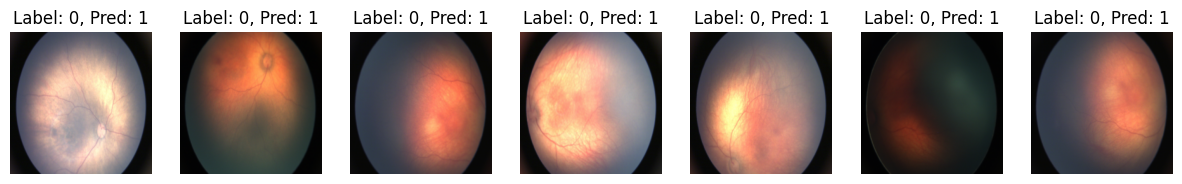

Training - Learning Rate: 0.003 - Epoch 1/10, Training Loss: 0.1627, Recall: 0.9501, Precision: 0.9499, Accuracy: 0.9501
Training - Learning Rate: 0.003 - Epoch 2/10, Training Loss: 0.1423, Recall: 0.9522, Precision: 0.9546, Accuracy: 0.9522
Training - Learning Rate: 0.003 - Epoch 3/10, Training Loss: 0.1141, Recall: 0.9688, Precision: 0.9699, Accuracy: 0.9688
Training - Learning Rate: 0.003 - Epoch 4/10, Training Loss: 0.1007, Recall: 0.9688, Precision: 0.9691, Accuracy: 0.9688
Training - Learning Rate: 0.003 - Epoch 5/10, Training Loss: 0.0943, Recall: 0.9709, Precision: 0.9718, Accuracy: 0.9709
Training - Learning Rate: 0.003 - Epoch 6/10, Training Loss: 0.0788, Recall: 0.9834, Precision: 0.9837, Accuracy: 0.9834
Training - Learning Rate: 0.003 - Epoch 7/10, Training Loss: 0.1064, Recall: 0.9917, Precision: 0.9922, Accuracy: 0.9917
Training - Learning Rate: 0.003 - Epoch 8/10, Training Loss: 0.0638, Recall: 0.9896, Precision: 0.9897, Accuracy: 0.9896
Training - Learning Rate: 0.003 

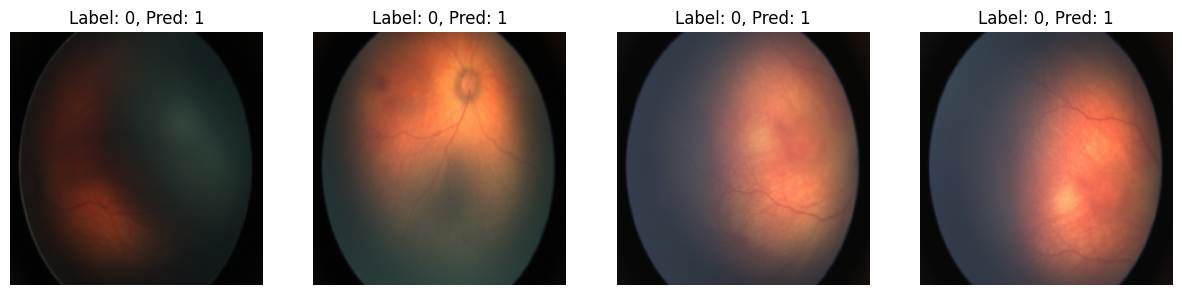

Training - Learning Rate: 0.01 - Epoch 1/10, Training Loss: 0.0511, Recall: 0.9896, Precision: 0.9897, Accuracy: 0.9896
Training - Learning Rate: 0.01 - Epoch 2/10, Training Loss: 0.2915, Recall: 0.9376, Precision: 0.9591, Accuracy: 0.9376
Training - Learning Rate: 0.01 - Epoch 3/10, Training Loss: 0.0310, Recall: 0.9938, Precision: 0.9938, Accuracy: 0.9938
Training - Learning Rate: 0.01 - Epoch 4/10, Training Loss: 0.0160, Recall: 1.0000, Precision: 1.0000, Accuracy: 1.0000
Training - Learning Rate: 0.01 - Epoch 5/10, Training Loss: 0.0163, Recall: 1.0000, Precision: 1.0000, Accuracy: 1.0000
Training - Learning Rate: 0.01 - Epoch 6/10, Training Loss: 0.0161, Recall: 0.9979, Precision: 0.9980, Accuracy: 0.9979
Training - Learning Rate: 0.01 - Epoch 7/10, Training Loss: 0.0231, Recall: 0.9979, Precision: 0.9979, Accuracy: 0.9979
Training - Learning Rate: 0.01 - Epoch 8/10, Training Loss: 0.1805, Recall: 0.9439, Precision: 0.9619, Accuracy: 0.9439
Training - Learning Rate: 0.01 - Epoch 9

TypeError: 'Axes' object is not iterable

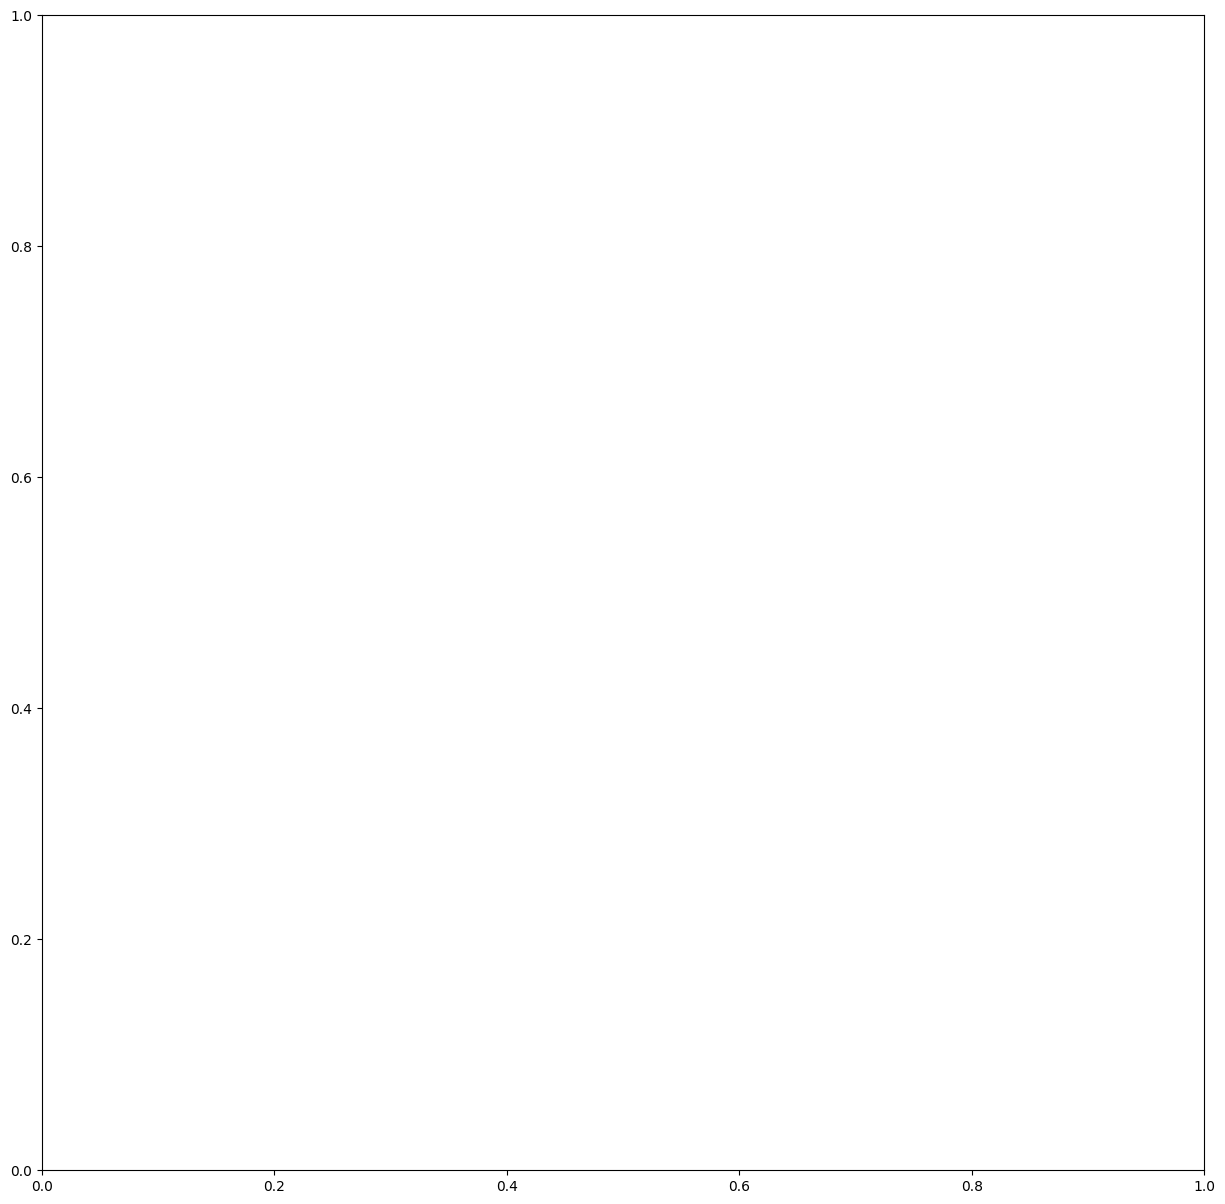

In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import models, transforms
from PIL import Image
from sklearn.metrics import precision_score, recall_score, accuracy_score
from tqdm import tqdm

# Определение устройства
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Создание преобразований для изображений
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

class ROP_Dataset(Dataset):
    def __init__(self, txt_file, image_dir, transform=None):
        self.image_list = pd.read_csv(txt_file, header=None)
        self.image_dir = image_dir
        self.transform = transform

    def __len__(self):
        return len(self.image_list)

    def __getitem__(self, idx):
        img_path = os.path.join(self.image_dir, self.image_list.iloc[idx, 0])
        image = Image.open(img_path).convert('RGB')
        img_tag = self.image_list.iloc[idx, 1]

        if self.transform:
            image = self.transform(image)
        sample = {"image": image, "tag": img_tag}

        return image, img_tag

# Create Dataset Training
dataset_train = ROP_Dataset(txt_file='./annotations/train.txt', image_dir='./annotations/images', transform=transform)
# Create Dataset Testing
dataset_test = ROP_Dataset(txt_file='./annotations/test.txt', image_dir='./annotations/images', transform=transform)
# Create Dataset Validation
dataset_valid = ROP_Dataset(txt_file='./annotations/valid.txt', image_dir='./annotations/images', transform=transform)

# DataLoader Training
dataloader_train = DataLoader(dataset_train, batch_size=32, shuffle=True)
# DataLoader Testing
dataloader_test = DataLoader(dataset_test, batch_size=32, shuffle=True)
# DataLoader Validation
dataloader_valid = DataLoader(dataset_valid, batch_size=32, shuffle=True)

# Загрузка модели ResNet-18 с предварительно обученными весами
model = models.resnet18(pretrained=True)
num_classes = 3  # Укажите правильное количество классов для вашей задачи
model.fc = torch.nn.Linear(model.fc.in_features, num_classes)
model = model.to(device)

# Определение функции потерь
criterion = torch.nn.CrossEntropyLoss()

# Функция для отображения неверно классифицированных изображений
def show_misclassified_images(images, labels, predictions):
    misclassified_indices = [i for i in range(len(labels)) if labels[i] != predictions[i]]
    misclassified_images = [images[i] for i in misclassified_indices]
    misclassified_labels = [labels[i] for i in misclassified_indices]
    misclassified_predictions = [predictions[i] for i in misclassified_indices]

    fig, axes = plt.subplots(1, len(misclassified_images), figsize=(15, 15))
    for idx, ax in enumerate(axes):
        img = misclassified_images[idx].cpu().numpy().transpose((1, 2, 0))
        label = misclassified_labels[idx]
        prediction = misclassified_predictions[idx]
        ax.imshow(img)
        ax.set_title(f"Label: {label}, Pred: {prediction}")
        ax.axis('off')
    plt.show()

# Тестирование модели
def test_model(learningRage):
    model.load_state_dict(torch.load(f'/content/drive/MyDrive/2_semestr/PP/model_3_{learningRage}.pth'))
    model.eval()
    all_labels = []
    all_predictions = []
    all_images = []

    with torch.no_grad():
        for inputs, labels in dataloader_test:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())
            all_images.extend(inputs.cpu())

    precision = precision_score(all_labels, all_predictions, average='weighted')
    recall = recall_score(all_labels, all_predictions, average='weighted')
    accuracy = accuracy_score(all_labels, all_predictions)
    print(f"Learning Rate: {learningRage}, Recall: {recall:.4f}, Precision: {precision:.4f}, Accuracy: {accuracy:.4f}")

    # Отображение неверно классифицированных изображений
    show_misclassified_images(all_images, all_labels, all_predictions)

# Функция для запуска обучения модели
def run_model(learningRate, num_epochs):
    optimizer = optim.SGD(model.parameters(), lr=learningRate)

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        all_labels = []
        all_predictions = []
        for inputs, labels in dataloader_train:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())

        epoch_loss = running_loss / len(dataset_train)
        precision = precision_score(all_labels, all_predictions, average='weighted')
        recall = recall_score(all_labels, all_predictions, average='weighted')
        accuracy = accuracy_score(all_labels, all_predictions)
        print(f"Training - Learning Rate: {learningRate} - Epoch {epoch+1}/{num_epochs}, Training Loss: {epoch_loss:.4f}, Recall: {recall:.4f}, Precision: {precision:.4f}, Accuracy: {accuracy:.4f}")

    model.eval()
    all_labels = []
    all_predictions = []
    with torch.no_grad():
        for inputs, labels in dataloader_valid:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())

    precision = precision_score(all_labels, all_predictions, average='weighted')
    recall = recall_score(all_labels, all_predictions, average='weighted')
    accuracy = accuracy_score(all_labels, all_predictions)
    print(f"\n\nValidation - Learning Rate: {learningRate}, Recall: {recall:.4f}, Precision: {precision:.4f}, Accuracy: {accuracy:.4f}\n\n")

    model.eval()
    all_labels = []
    all_predictions = []
    all_images = []
    with torch.no_grad():
        for inputs, labels in dataloader_test:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())
            all_images.extend(inputs.cpu())

    precision = precision_score(all_labels, all_predictions, average='weighted')
    recall = recall_score(all_labels, all_predictions, average='weighted')
    accuracy = accuracy_score(all_labels, all_predictions)
    print(f"\n\nTesting - Learning Rate: {learningRate}, Recall: {recall:.4f}, Precision: {precision:.4f}, Accuracy: {accuracy:.4f}\n\n")

    show_misclassified_images(all_images, all_labels, all_predictions)

# Запуск модели для нескольких значений learning_rate
learning_rates = [0.001, 0.003, 0.01]
num_epochs = 10
for lr in learning_rates:
    run_model(lr, num_epochs)

n_classes = 2
names_classes = ["healthy", "unhealthy"]

class_correct = torch.zeros(n_classes)
class_total = torch.zeros(n_classes)

labels = []
predicts = []

model.eval()
with torch.no_grad():
    for x, y in tqdm(dataloader_test):
        x = x.to(device)
        y = y.to('cpu')
        y_pred = model(x).to('cpu')
        cls_pred = torch.argmax(y_pred, dim=1)
        c = (cls_pred == y).squeeze()
        for i in range(x.shape[0]):
            label = y[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
        labels.append(y)
        predicts.append(cls_pred)

labels = torch.cat(labels, dim=0)
predicts = torch.cat(predicts, dim=0)

for i in range(n_classes):
    print('Accuracy of %5s : %2d %%' % (names_classes[i], 100 * class_correct[i] / class_total[i]))

# Функция для отображения фильтрованных изображений
def plot_filtered_images(images, filters):
    images = torch.cat([i.unsqueeze(0) for i in images], dim=0).cpu
